In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Pyber_city_date.csv"
ride_data_to_load = "Pyber_ride_date.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

len(city_df), city_df.head()

(120,            city  driver_count   type
 0   Richardfort            38  Urban
 1  Williamsstad            59  Urban
 2   Port Angela            67  Urban
 3    Rodneyfort            34  Urban
 4   West Robert            39  Urban)

In [3]:
len(ride_df), ride_df.head()

(2375,                  city                 date   fare        ride_id
 0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
 1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
 2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
 3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
 4          South Jack  2018-03-06 04:28:35  34.58  3908451377344)

In [134]:
# Combine the data into a single dataset

combi_df = pd.merge(ride_df,city_df, how='left', on = "city" )

# Remove unneeded columns
#del combi_df["ride_id"]

# Display the data table for preview
combi_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [207]:
unique = combi_df["city"].unique()
len(unique)

#There are 120 unique cities on a list of 2375 rides

120

In [136]:
fare_group = combi_df.groupby(["type","city"], as_index = False).mean()
del fare_group["ride_id"]
fare_group["fare"] = round(fare_group["fare"],2)
fare_group = fare_group.rename(columns ={"fare":"Ave Fare $",
                              "driver_count" : "# of Drivers"})
#fare_group

total_rides = combi_df.groupby(["type","city"], as_index = False).count()
del total_rides["driver_count"]
del total_rides["fare"]
del total_rides["ride_id"]
total_rides = total_rides.rename(columns = {"date":"Total # of Rides"})
total_rides
                                
result_table = pd.merge(fare_group, total_rides, on=['type','city'])

result_table.head()


,type,city,Ave Fare $,# of Drivers,Total # of Rides
0,Rural,Bradshawfurt,40.06,7.0,10
1,Rural,Garzaport,24.12,7.0,3
2,Rural,Harringtonfort,33.47,4.0,6
3,Rural,Jessicaport,36.01,1.0,6
4,Rural,Lake Jamie,34.36,4.0,6


In [139]:
# Alternative way to apply specific functions to specific columns
#http://pandas.pydata.org/pandas-docs/stable/groupby.html --> Example Input[70]
# grouped = df.groupby('A')
# grouped.agg({'C' : 'sum', 'D' : 'std'})

datasort = combi_df.groupby(["type","city"])

result_table2 = datasort.agg({"ride_id":"count", "fare":"mean", "driver_count":"mean"})
result_table2 = result_table2.rename(columns ={"fare":"Ave Fare $",
                                              "driver_count" : "# of Drivers",
                                               "ride_id":"Total # of Rides"})
result_table2.head()

Total # of Rides  Ave Fare $  # of Drivers
type  city                                                      
Rural Bradshawfurt                  10   40.064000             7
      Garzaport                      3   24.123333             7
      Harringtonfort                 6   33.470000             4
      Jessicaport                    6   36.013333             1
      Lake Jamie                     6   34.358333             4

## Bubble Plot of Ride Sharing Data

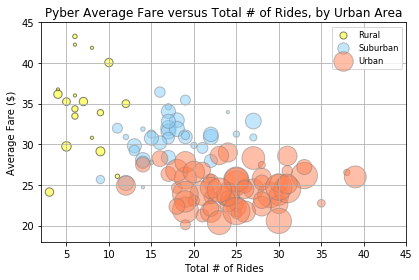

In [225]:
# Obtain the x and y coordinates for each of the three city types
# separate out the data

rural = result_table.loc[result_table["type"] == "Rural",["type","city", "Ave Fare $",  "Total # of Rides", "# of Drivers"]]
suburban = result_table.loc[result_table["type"] == "Suburban",["type","city", "Ave Fare $","Total # of Rides", "# of Drivers"]]
urban = result_table.loc[result_table["type"] == "Urban",["type","city", "Ave Fare $", "Total # of Rides", "# of Drivers"]]

num_rural = len(rural)
num_suburban = len(suburban)
num_urban = len(urban)

ruralx = rural["Total # of Rides"]
ruraly = rural["Ave Fare $"]
rurals = rural["# of Drivers"]*10

suburbanx = suburban["Total # of Rides"]
suburbany = suburban["Ave Fare $"]
suburbans = suburban["# of Drivers"]*10

urbanx = urban["Total # of Rides"]
urbany = urban["Ave Fare $"]
urbans = urban["# of Drivers"]*10

# Build the scatter plots for each city types

rural = plt.scatter(ruralx, ruraly, marker = "o", facecolors = "yellow", edgecolors = "black", s=rurals, alpha = 0.5, label="Rural")
suburban =plt.scatter(suburbanx,suburbany, marker ="o", facecolors = "lightskyblue",edgecolors ="grey", s=suburbans, alpha = 0.5, label='Suburban')
urban =plt.scatter(urbanx,urbany, marker ="o", facecolors = "coral", edgecolors = "grey", s=urbans, alpha = 0.5, label="Urban")

#plt.show()

# Incorporate the other graph properties
plt.ylim(18, 45)
plt.xlim(2, 45)
plt.grid()

plt.title("Pyber Average Fare versus Total # of Rides, by Urban Area")
plt.xlabel("Total # of Rides")
plt.ylabel("Average Fare ($)")


# Create a legend

plt.legend(handles=[rural, suburban, urban], loc="upper right", fontsize ="small", fancybox=True)
#plt.legend(loc="best", fontsize="small", fancybox=True)
plt.tight_layout()

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("./Pyber_fare_vs_rides.png")
plt.show()
#print(data)

In [165]:
# Show plot
plt.show()

## Total Fares by City Type

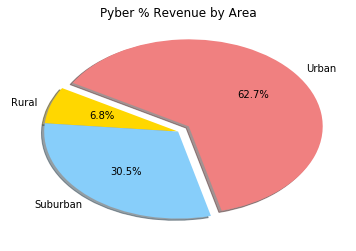

In [254]:
# Calculate Type Percents
#gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
#members = [49, 92, 84, 53]
#x_axis = np.arange(0, len(gyms))
#colors = ["yellowgreen", "red", "lightskyblue", "coral"]
#explode = (0, 0.05, 0, 0)
#plt.title("Gym Popularity")
#plt.pie(members, explode = explode, labels= gyms, colors = colors, autopct = "%1.1f%%", shadow ="True", startangle = 90)
#plt.show()

areas = result_table["type"].unique()


#Separate calculation of sum of revenue by area
num_cities = combi_df["fare"].groupby(combi_df["type"]).sum()

# Build Pie Chart
x_axis = np.arange(0, len(areas))
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.0,0.0, 0.1)
plt.title("Pyber % Revenue by Area")
plt.pie(num_cities, explode = explode, labels= areas, colors = colors, autopct = "%1.1f%%", shadow ="True", startangle = 150)

# Save Figure
plt.savefig("./Pyber_revenue_by_area.png")
plt.show()

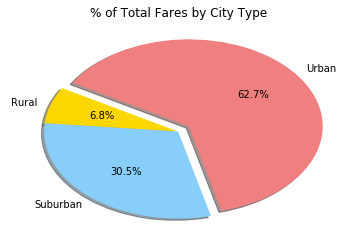

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

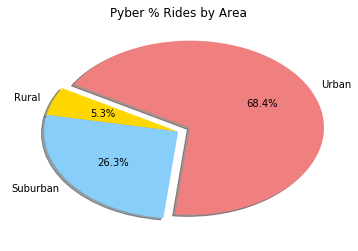

In [255]:
# Calculate Ride Percents
#Separate calculation of # of rides by area
num_rides = combi_df["fare"].groupby(combi_df["type"]).count()

# Build Pie Chart
x_axis = np.arange(0, len(areas))
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.0,0.0, 0.1)
plt.title("Pyber % Rides by Area")
plt.pie(num_rides, explode = explode, labels= areas, colors = colors, autopct = "%1.1f%%", shadow ="True", startangle = 150)

# Save Figure
plt.savefig("./Pyber_rides_by_area.png")
plt.show()


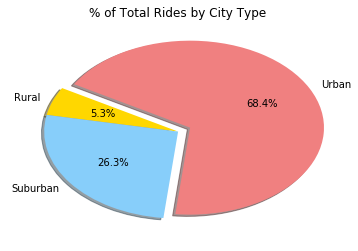

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

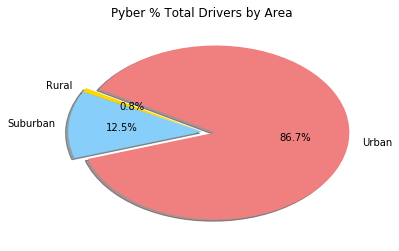

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [278]:
# Calculate Driver Percents
#Separate calculation of Total # of drivers (%) by area

#age_df = purchase_data[["SN", "Age"]]
#age_unique = age_df.drop_duplicates()
#age_unique = age_unique[["Age"]]

drivers_df = combi_df[["type", 'driver_count']]
#driver_unique = drivers_df.drop_duplicates("ride_id")    



num_drivers = drivers_df["driver_count"].groupby(combi_df["type"]).sum()

# Build Pie Chart
x_axis = np.arange(0, len(areas))
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.0,0.0, 0.1)
plt.title("Pyber % Total Drivers by Area")
plt.pie(num_drivers, explode = explode, labels= areas, colors = colors, autopct = "%1.1f%%", shadow ="True", startangle = 150)

# Save Figure
plt.savefig("./Pyber_drivers_by_area.png")
plt.show()

num_drivers

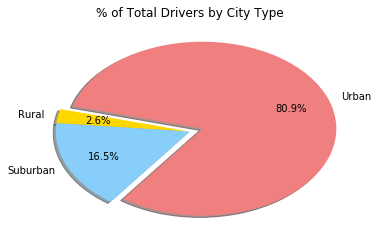

In [6]:
# Show Figure
plt.show()